In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
from keras.utils.np_utils import to_categorical
import keras.backend as K

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import add_dummy_feature
from sklearn.metrics import f1_score

import seaborn as sns

In [2]:
df = pd.read_csv('../data/wines.csv')

In [4]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


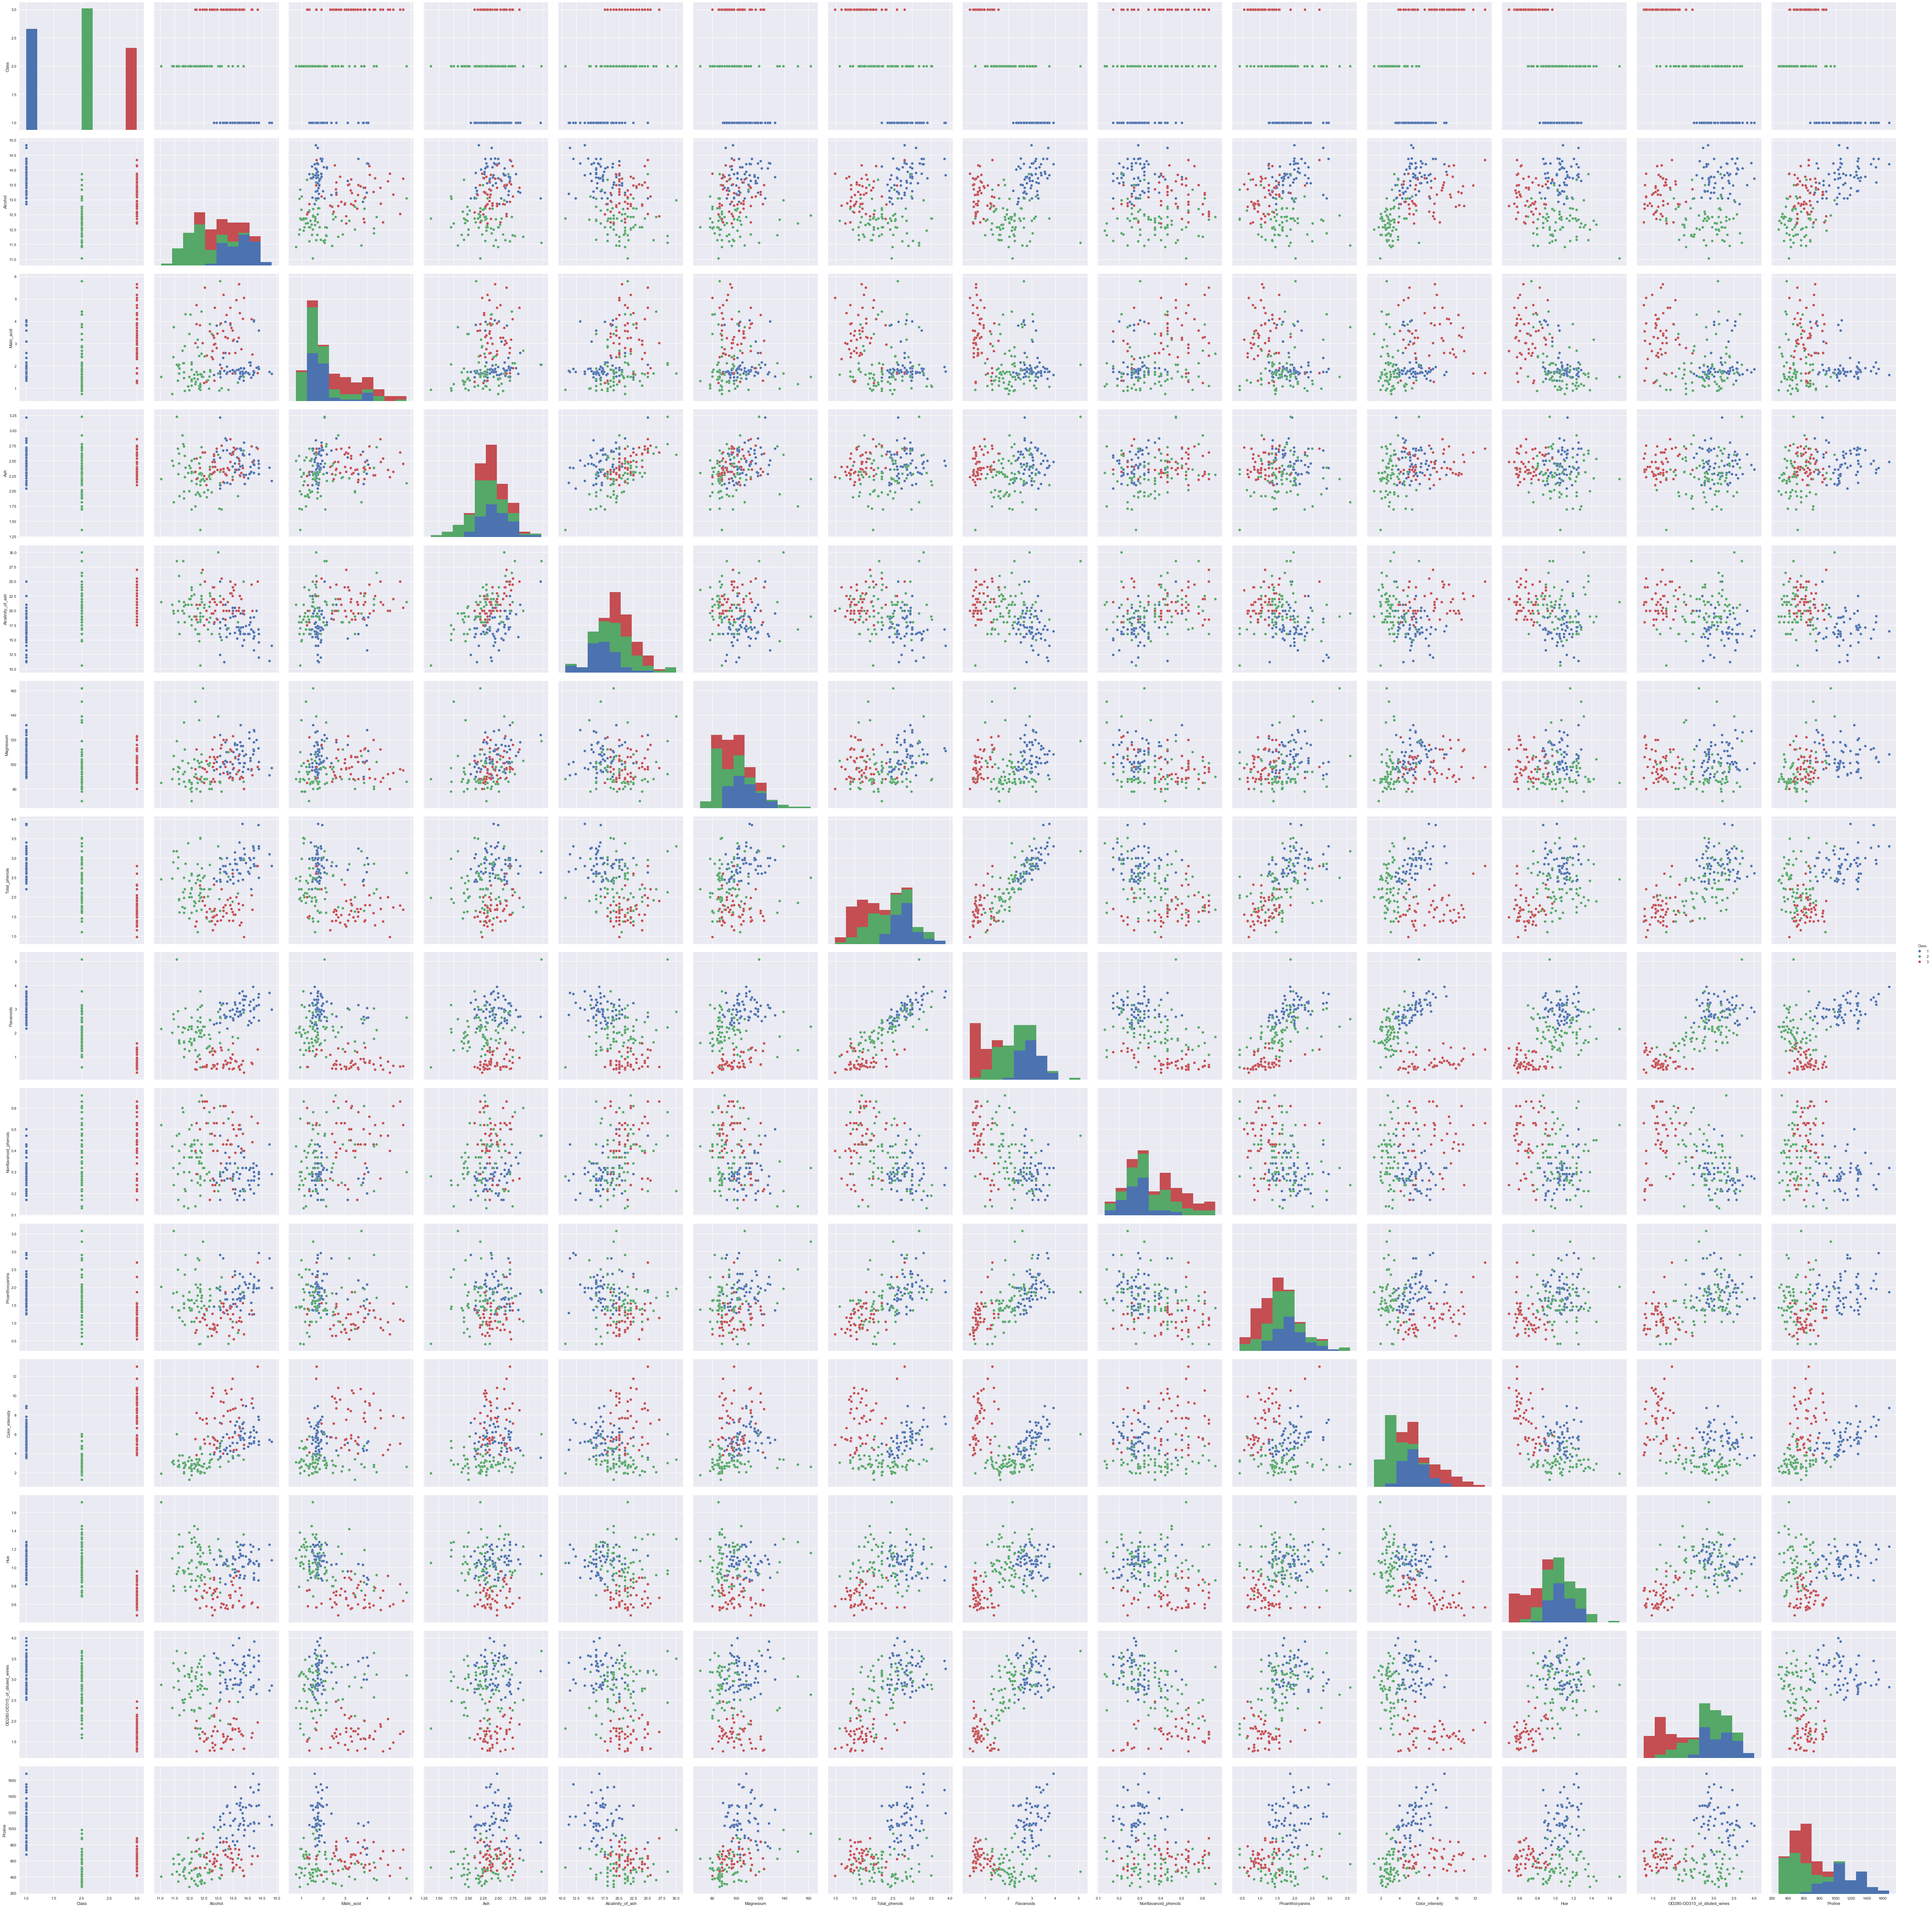

In [10]:
sns.pairplot(df, hue='Class', size = 5)

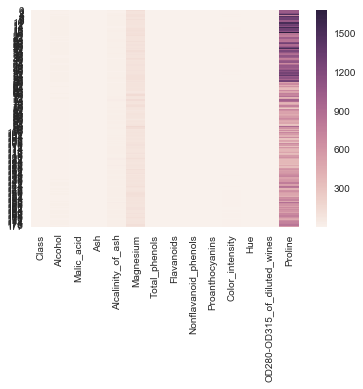

In [89]:
sns.heatmap(df)

In [14]:
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [34]:
X = scale(df.drop('Class', axis = 1).values)
y = to_categorical(df['Class'].values - 1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X.shape

(178, 13)

In [54]:
model = Sequential()
model.add(Dense(5, input_shape=(13,), activation="relu"))
model.add(Dense(3, activation="softmax"))
model.compile(Adam(lr=0.1), "categorical_crossentropy", metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 113 samples, validate on 29 samples
Epoch 1/50
113/113 [==============================] - 0s - loss: 0.9267 - acc: 0.6106 - val_loss: 0.5163 - val_acc: 0.8966
Epoch 2/50
113/113 [==============================] - 0s - loss: 0.3204 - acc: 0.9381 - val_loss: 0.1464 - val_acc: 0.9310
Epoch 3/50
113/113 [==============================] - 0s - loss: 0.0884 - acc: 0.9646 - val_loss: 0.0591 - val_acc: 0.9655
Epoch 4/50
113/113 [==============================] - 0s - loss: 0.0176 - acc: 1.0000 - val_loss: 0.0339 - val_acc: 0.9655
Epoch 5/50
113/113 [==============================] - 0s - loss: 0.0069 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 6/50
113/113 [==============================] - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 7/50
113/113 [==============================] - 0s - loss: 9.0547e-04 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 8/50
113/113 [==============================] - 0s - loss: 4.2915e-04 - acc: 1.0000 

In [55]:
y_pred = model.predict_classes(X_test)
y_test_cat = np.argmax(y_test, axis=1)
score = f1_score(y_pred, y_test_cat, average="weighted")
print(score)

32/36 [=========================>....] - ETA: 0s0.945091945092


In [56]:
print(confusion_matrix(y_pred, y_test_cat))

[[16  1  0]
 [ 0 12  1]
 [ 0  0  6]]


=========================== EXERCISE 2 ===========================

In [85]:
model = Sequential()
model.add(Dense(8, input_shape=(13,), activation="tanh", kernel_initializer="he_normal"))
model.add(Dense(5, activation="tanh", kernel_initializer="he_normal"))
model.add(Dense(2, activation="tanh", kernel_initializer="he_normal"))
model.add(Dense(3, activation="softmax"))
model.compile(RMSprop(lr=0.1), "categorical_crossentropy", metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
142/142 [==============================] - 0s - loss: 0.7086 - acc: 0.5986     
Epoch 2/20
142/142 [==============================] - 0s - loss: 0.6006 - acc: 0.6620     
Epoch 3/20
142/142 [==============================] - 0s - loss: 0.3623 - acc: 0.8873     
Epoch 4/20
142/142 [==============================] - 0s - loss: 0.1698 - acc: 0.9789     
Epoch 5/20
142/142 [==============================] - 0s - loss: 0.0707 - acc: 1.0000     
Epoch 6/20
142/142 [==============================] - 0s - loss: 0.0447 - acc: 1.0000     
Epoch 7/20
142/142 [==============================] - 0s - loss: 0.0308 - acc: 1.0000     
Epoch 8/20
142/142 [==============================] - 0s - loss: 0.0224 - acc: 1.0000     
Epoch 9/20
142/142 [==============================] - 0s - loss: 0.0166 - acc: 1.0000     
Epoch 10/20
142/142 [==============================] - 0s - loss: 0.0125 - acc: 1.0000     
Epoch 11/20
142/142 [==============================] - 0s - loss: 0.0095 - acc: 1.0000   

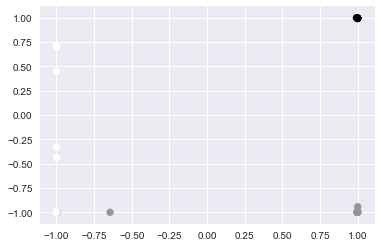

In [86]:
layer1 = model.layers[0]
layer3 = model.layers[2]
f = K.function([layer1.input], [layer3.output])
features = f([X_test])[0]
plt.scatter(features[:, 0], features[:, 1], c=y_test_cat)

In [87]:
pd.DataFrame(y_test_cat)[0].value_counts()

0    16
1    13
2     7
Name: 0, dtype: int64